In [13]:
import numpy as np
import matplotlib.pyplot as mp
import uncertainties as uc
from astropy.constants import g0
import uncertainties.umath as um
import uncertainties.unumpy as unp
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["font.family"] = "serif"
mp.rcParams["text.usetex"] = True

In [3]:
unp_n = unp.nominal_values
unp_sd = unp.std_devs

In [15]:
Tl = lambda L, R, r, d : 2*np.pi * np.sqrt((L-r)/g0) * 2*R/d/np.sqrt(12)

## constant $d$, varying $L$

In [79]:
r = 0.5e-2
L1 = unp.uarray([37e-2, 30e-2, 23.4e-2, 17.4e-2, 10.5e-2], 0.5e-2)
L2 = unp.uarray([37e-2, 30e-2, 23.4e-2, 17.5e-2, 10.7e-2], 0.5e-2)
L = (L1+L2)/2
d = uc.ufloat(46e-2, 0.5e-2)
R = uc.ufloat(50e-2, 0.5e-2)
counts = np.array([81, 89, 98, 119, 142], int)
t = np.array([60.36, 60.30, 60.00, 60.02, 60.25], float)
f = counts/t
T = 1/f

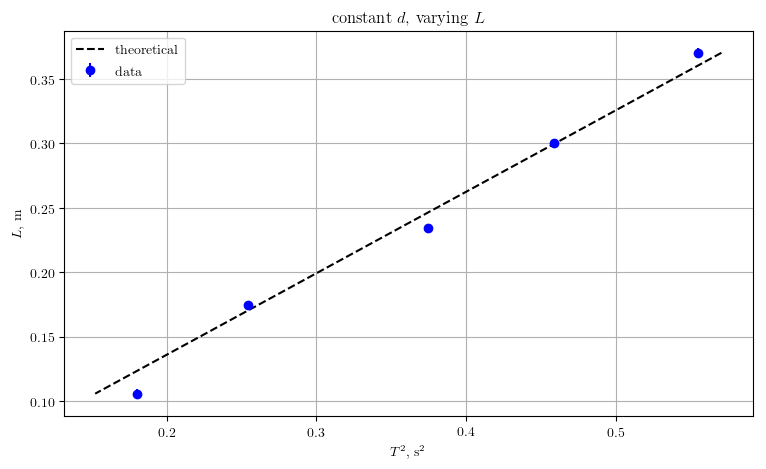

In [71]:
mp.plot(Tl(unp_n(L), R.n, r, d.n)**2, unp_n(L), "k--", label="theoretical")
mp.errorbar(unp_n(T)**2, unp_n(L), unp_sd(L), None, "bo", label="data")
mp.xlabel("$T^2$, s$^2$")
mp.ylabel("$L$, m")
mp.grid(True)
mp.legend()
mp.title("constant $d$, varying $L$")

mp.savefig("constdvL.png", dpi=300, bbox_inches="tight")
mp.show()

In [85]:
print("obs \t exp \t err")
for i in range(len(L1)):
    obs = unp_n(T)[i]
    exp = (Tl(unp_n(L)[i], R.n, r, d.n)).value
    print("%.3f \t %.3f \t %.2f"%(obs, exp, abs(obs-exp)/exp*100))

obs 	 exp 	 err
0.745 	 0.761 	 2.04
0.678 	 0.684 	 0.93
0.612 	 0.603 	 1.61
0.504 	 0.518 	 2.70
0.424 	 0.400 	 6.03


## constant $L$, varying $d$

In [86]:
r = 0.5e-2
L = 23.4e-2
d = unp.uarray([31e-2, 16e-2, 8e-2], 0.5e-2)
R = uc.ufloat(50e-2, 0.5e-2)
counts = np.array([74, 36, 19], int)
t = np.array([60.51, 60.73, 61.42], float)
f = counts/t
T = 1/f

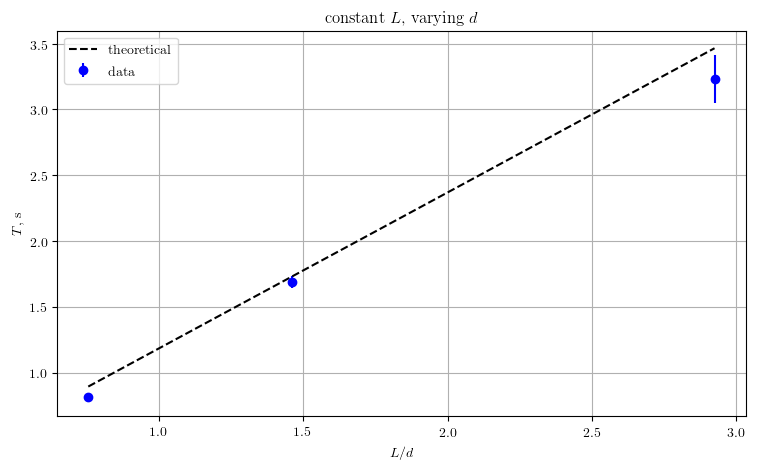

In [87]:
mp.plot(L/unp_n(d), Tl(L, R.n, r, unp_n(d)), "k--", label="theoretical")
mp.errorbar(unp_n(L/d), unp_n(T), unp_sd(L/d), None, "bo", label="data")
mp.xlabel("$L/d$")
mp.ylabel("$T$, s")
mp.legend()
mp.grid(True)
mp.title("constant $L$, varying $d$")

mp.savefig("consLvd.png", dpi=300, bbox_inches="tight")
mp.show()

In [90]:
print("obs \t exp \t err")
for i in range(len(d)):
    obs = unp_n(T)[i]
    exp = (Tl(L, R.n, r, unp_n(d)[i])).value
    print("%.3f \t %.3f \t %.2f"%(obs, exp, abs(obs-exp)/exp*100))

obs 	 exp 	 err
0.818 	 0.894 	 8.54
1.687 	 1.732 	 2.62
3.233 	 3.465 	 6.70
